# Sentiment Analysis
Sentiment analysis using ensemble classifier
* test data evaluation
* apply on full data

## Install and import required libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read datasets

In [3]:
xgboost_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/test results/xgboost_test_dataset.csv')

xgboost_df.head()

,clean_text,manual_label,xgboost
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos


In [4]:
lightgbm_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/test results/lightgbm_test_dataset.csv')

lightgbm_df.head()

,clean_text,manual_label,lightgbm
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos


In [5]:
knn_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/test results/knn_test_dataset.csv')

knn_df.head()

,clean_text,manual_label,knn
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,neu


In [6]:
svm_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/test results/svm_test_dataset.csv')

svm_df.head()

,clean_text,manual_label,svm
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,neu


In [7]:
decisiontree_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/test results/decision_tree_test_dataset.csv')

decisiontree_df.head()

,clean_text,manual_label,decision_tree
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,pos
2,nft lending agreement benddao ethereum reserve...,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos


In [8]:
naivebayes_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/test results/naive_bayes_test_dataset.csv')

naivebayes_df.head()

,clean_text,manual_label,naive_bayes
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neg
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos


## Test data 1 
* all

In [17]:
df = pd.concat([xgboost_df, lightgbm_df['lightgbm'], knn_df['knn'], svm_df['svm'], decisiontree_df['decision_tree'], naivebayes_df['naive_bayes']], axis=1)

df.head()

,clean_text,manual_label,xgboost,lightgbm,knn,svm,decision_tree,naive_bayes
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu,neu,neu,neu,neu,neg
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu,neu,neu,neu,pos,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos,pos,pos,pos,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos,pos,pos,pos,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos,pos,neu,neu,pos,pos


In [18]:
#df.to_csv('concat_test_results.csv', index = False)

In [19]:
index = 0
length = len(df)
top_count = []

In [20]:
while index < length:
  counts = df.loc[index, ['xgboost', 'lightgbm', 'knn', 'svm', 'decision_tree', 'naive_bayes']].value_counts()
  top_count.append(counts.index[0])
  index = index + 1

In [21]:
df = df.assign(prediction=top_count)

df.head()

,clean_text,manual_label,xgboost,lightgbm,knn,svm,decision_tree,naive_bayes,prediction
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu,neu,neu,neu,neu,neg,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu,neu,neu,neu,pos,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos,pos,pos,pos,pos,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos,pos,pos,pos,pos,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos,pos,neu,neu,pos,pos,pos


In [22]:
df.to_csv('ensemble_noKNN_results.csv', index = False)

In [23]:
print(classification_report(df['manual_label'], df['prediction']))

              precision    recall  f1-score   support

         neg       0.60      0.57      0.59        21
         neu       0.70      0.63      0.66       102
         pos       0.87      0.91      0.89       277

    accuracy                           0.82       400
   macro avg       0.73      0.70      0.71       400
weighted avg       0.81      0.82      0.82       400



## Test data 2
* no knn

In [24]:
df = pd.concat([xgboost_df, lightgbm_df['lightgbm'], svm_df['svm'], decisiontree_df['decision_tree'], naivebayes_df['naive_bayes']], axis=1)

df.head()

,clean_text,manual_label,xgboost,lightgbm,svm,decision_tree,naive_bayes
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu,neu,neu,neu,neg
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu,neu,neu,pos,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos,pos,pos,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos,pos,pos,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos,pos,neu,pos,pos


In [25]:
#df.to_csv('concat_test_results.csv', index = False)

In [26]:
index = 0
length = len(df)
top_count = []

In [27]:
while index < length:
  counts = df.loc[index, ['xgboost', 'lightgbm', 'svm', 'decision_tree', 'naive_bayes']].value_counts()
  top_count.append(counts.index[0])
  index = index + 1

In [28]:
df = df.assign(prediction=top_count)

df.head()

,clean_text,manual_label,xgboost,lightgbm,svm,decision_tree,naive_bayes,prediction
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu,neu,neu,neu,neg,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu,neu,neu,pos,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos,pos,pos,pos,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos,pos,pos,pos,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos,pos,neu,pos,pos,pos


In [29]:
df.to_csv('ensemble_all_results.csv', index = False)

In [30]:
print(classification_report(df['manual_label'], df['prediction']))

              precision    recall  f1-score   support

         neg       0.61      0.67      0.64        21
         neu       0.71      0.58      0.64       102
         pos       0.86      0.92      0.89       277

    accuracy                           0.82       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.81      0.82      0.81       400



In [31]:
df = pd.concat([xgboost_df, lightgbm_df['lightgbm'], svm_df['svm']], axis=1)

df.head()

,clean_text,manual_label,xgboost,lightgbm,svm
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu,neu,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos,pos,neu


In [32]:
#df.to_csv('concat_test_results.csv', index = False)

In [33]:
index = 0
length = len(df)
top_count = []

In [34]:
while index < length:
  counts = df.loc[index, ['xgboost', 'lightgbm', 'svm']].value_counts()
  top_count.append(counts.index[0])
  index = index + 1

In [35]:
df = df.assign(prediction=top_count)

df.head()

,clean_text,manual_label,xgboost,lightgbm,svm,prediction
0,day mapo tofu healthy meal mean tofu got ta co...,neu,neu,neu,neu,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu,neu,neu,neu,neu
2,nft lending agreement benddao ethereum reserve...,pos,pos,pos,pos,pos
3,meebit bought eth usd blur meebits meebitsnft,pos,pos,pos,pos,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos,pos,pos,neu,pos


In [36]:
df.to_csv('prediction_test_results_5.csv', index = False)

In [37]:
print(classification_report(df['manual_label'], df['prediction']))

              precision    recall  f1-score   support

         neg       0.58      0.52      0.55        21
         neu       0.67      0.71      0.69       102
         pos       0.90      0.89      0.89       277

    accuracy                           0.82       400
   macro avg       0.72      0.71      0.71       400
weighted avg       0.82      0.82      0.82       400



## Apply on full data

In [38]:
xgboost_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/xgboost_full_dataset.csv')

xgboost_df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,xgboost
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [39]:
lightgbm_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/lightgbm_full_dataset.csv')

lightgbm_df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,lightgbm
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [40]:
svm_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/svm_full_dataset.csv')

svm_df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,svm
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [41]:
decisiontree_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/decision_tree_full_dataset.csv')

decisiontree_df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,decision_tree
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [42]:
naivebayes_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/naive_bayes_full_dataset.csv')

naivebayes_df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,naive_bayes
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [43]:
df = pd.concat([xgboost_df, lightgbm_df['lightgbm'], svm_df['svm'], decisiontree_df['decision_tree'], naivebayes_df['naive_bayes']], axis=1)

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,xgboost,lightgbm,svm,decision_tree,naive_bayes
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos,pos,pos,pos,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos,pos,pos,pos,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos,pos,pos,pos,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos,pos,pos,pos,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos,pos,pos,pos,pos


In [44]:
#df.to_csv('concat_results.csv', index = False)

In [45]:
index = 0
length = len(df)
top_count = []

In [46]:
while index < length:
  counts = df.loc[index, ['xgboost', 'lightgbm', 'svm', 'decision_tree', 'naive_bayes']].value_counts()
  top_count.append(counts.index[0])
  index = index + 1

In [47]:
df = df.assign(prediction=top_count)

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,xgboost,lightgbm,svm,decision_tree,naive_bayes,prediction
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos,pos,pos,pos,pos,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos,pos,pos,pos,pos,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos,pos,pos,pos,pos,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos,pos,pos,pos,pos,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos,pos,pos,pos,pos,pos


In [48]:
df.to_csv('ensemble_final_results.csv', index = False)

In [49]:
counts = df['prediction'].value_counts()

counts

pos    15397
neu     3698
neg     1200
Name: prediction, dtype: int64

<Axes: >

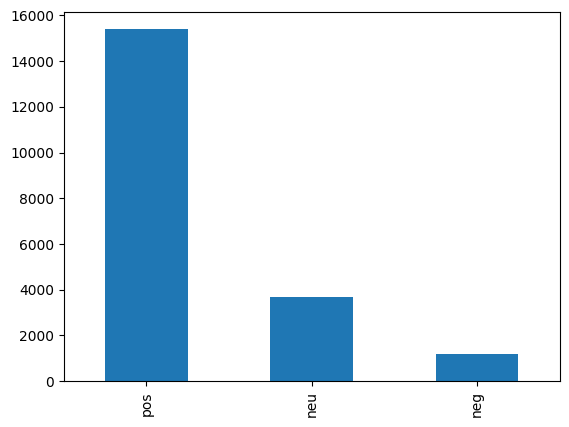

In [50]:
df['prediction'].value_counts().plot.bar()

## random

In [57]:
df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/results/RoBERTa_full_dataset_final.csv')

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,RoBERTa Predictions
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [58]:
counts = df['RoBERTa Predictions'].value_counts()

counts

pos    14252
neu     4488
neg     1555
Name: RoBERTa Predictions, dtype: int64

<Axes: >

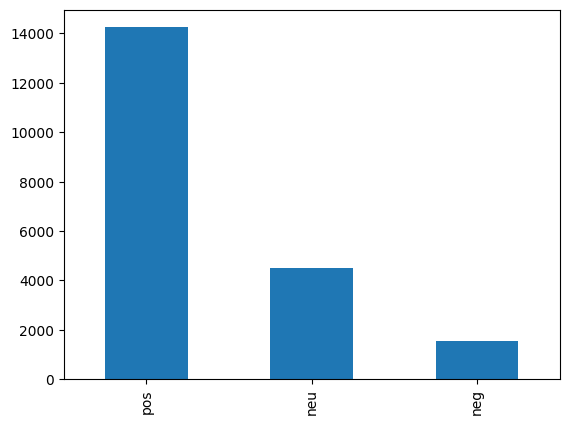

In [59]:
df['RoBERTa Predictions'].value_counts().plot.bar()